<a href="https://colab.research.google.com/github/jpriyanshii/SVM_vs_CNN/blob/main/SVM_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [39]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0   #normalising gray-scale images between 0-1

In [40]:
#Machine Learning Approach using SVM
x_train_flat= x_train.reshape(-1, 28*28)     #2d image data to 1d feature matrix(width,height).-1 helps numpy to take sample size from data dynamically.
x_test_flat= x_test.reshape(-1, 28*28)       #svm expects 3d svm input (sample size, 28, 28) -> (sample size, 784)

In [41]:
print("Training SVM Model...")
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(x_train_flat, y_train)
print("SVM Model Trained! ")

Training SVM Model...
SVM Model Trained! 


In [42]:
y_pred_svm= svm_model.predict(x_test_flat)
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {accuracy_svm:.2f}%")

SVM Accuracy: 97.92%


In [43]:
#Deep Learning Approach using CNN
x_train_cnn= x_train.reshape(-1,28,28,1)  #2d data to 3d data(width,height,o/p channels)
x_test_cnn= x_test.reshape(-1,28,28,1)    #tensorflow expects 4d tensor input

In [44]:
print("Training CNN Model...")
cnn_model= Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # we have 0-9 digits in ouput so 10 neurons
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test))
print('CNN Model Trained!')

Training CNN Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8688 - loss: 0.4112 - val_accuracy: 0.9862 - val_loss: 0.0434
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9788 - loss: 0.0685 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9907 - val_loss: 0.0279
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9857 - loss: 0.0443 - val_accuracy: 0.9916 - val_loss: 0.0256
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9887 - loss: 0.0347 - val_accuracy: 0.9920 - val_loss: 0.0230
CNN Model Trained!


In [47]:
test_loss, accuracy_cnn = cnn_model.evaluate(x_test_cnn, y_test)
accuracy_cnn *= 100
print(f"Accuracy of CNN Model: {accuracy_cnn:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9898 - loss: 0.0285
Accuracy of CNN Model: 99.20%


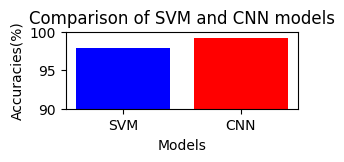

In [54]:
#visualizing the comparison
models=['SVM', 'CNN']
accuracies= [accuracy_svm, accuracy_cnn]

plt.figure(figsize=(3,1))
plt.bar(models, accuracies, color=['blue','red'])
plt.xlabel('Models')
plt.ylabel('Accuracies(%)')
plt.title('Comparison of SVM and CNN models')
plt.ylim(90,100)
plt.show()
